In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
#Funcion de la Hipotesis
def h_vec(x, theta):
    return np.dot(x, theta)

In [3]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    J = cost(Theta, X, y ,m)

    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    
    return J

In [4]:
#Función que calcula el error cuadrático medio, se usa en el coste y en las prueba de training y validación
def cost(Theta, X, y, m):
    h = h_vec(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    return J

In [5]:
#Función de gradiente regularizada
def gradient_funct(Theta, X, y, Lambda):

    m = np.shape(X)[0]
    h = h_vec(X, Theta)
    grad = np.dot(X.T, h - y)
    grad = grad/m
    reg_term = (Lambda/m)*np.insert(Theta[1:],0,0)
    grad = grad + reg_term

    return grad

In [6]:
#coste y gradiente que se le pasa al optimize
def cost_and_gradient(Theta, X, y, Lambda):
    return cost_funct(Theta, X, y, Lambda), gradient_funct(Theta, X, y, Lambda)

# Apartado 1. Regresión Lineal Regularizada

In [7]:
def draw_graph(Theta, X_ones, X, y):
    plt.scatter(X, y, marker = 'x', c = 'red', label="Entry")
    y = h_vec(X_ones, Theta)
    plt.plot(X, y, c='blue')
    plt.savefig("Apartado1.png")
    plt.legend()
    
    plt.show()
    

In [8]:
def main_parte1():
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    X = mat.get("X")
    y = mat.get("y")
    #Ponemos la y en forma de fila
    y = y[:, -1]
    
    Lambda = 1
    X_ones = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    
    Theta = np.ones(X_ones.shape[1])
    
    cost = cost_funct(Theta, X_ones, y, Lambda)
    grad = gradient_funct(Theta, X_ones, y, Lambda)
    m = np.shape(X)[0]
    
    print("cost:", cost)
    print("grad:", grad)
    
    #result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(X, y, Lambda))
    result = opt.minimize(cost_and_gradient, Theta, args=(X_ones, y, Lambda), jac=True, method='TNC')
    print(result)
    #ThetaOpt = result[0]
    ThetaOpt = result.x

    draw_graph(ThetaOpt, X_ones,X, y)

cost: 303.9931922202643
grad: [-15.30301567 598.25074417]
     fun: 22.379541822940265
     jac: array([1.25341733e-08, 8.56473651e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 3
  status: 0
 success: True
       x: array([13.08771417,  0.367742  ])


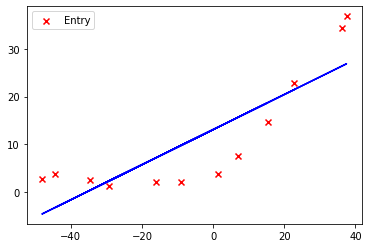

In [9]:
main_parte1()

# Apartado 2.  Curvas de aprendizaje

In [10]:
def learning_curve(X, y, Lambda, Theta, Xval, yval):
    
    m1 = X.shape[0]
    m2 = Xval.shape[0]
    #Inicializamos la lista de los errores a 0
    err1 = np.zeros(m1)
    err2 = np.zeros(m2)
    
    for i in range(1, X.shape[0] + 1):
        result = opt.minimize(cost_and_gradient, Theta, args=(X[0:i], y[0:i], Lambda), jac=True, method='TNC')
        ThetasOpt = result.x
        
        #Añadimos el error para X e y de entrenamiento 
        err1[i - 1] = cost(ThetasOpt, X[0:i], y[0:i], m1)
        #Añadimos el error para X e y del crossvalidation
        err2[i - 1] = cost(ThetasOpt, Xval, yval, m2)
        
    return err1, err2

In [11]:
def draw_learning_curve(err1, err2, title):
    l = np.arange(len(err1))
    l = l+1
    b = err1
    plt.title(title)
    plt.xlabel("Cantidad datos")
    plt.ylabel("error")
    plt.plot(l, b, c="blue", label="Train")
    
    d = err2[0:len(err1)]
    plt.plot(l, d, c="orange", label="Cross Validation")
    plt.legend()

In [12]:
def main_part2():
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    X = mat.get("X")
    y = mat.get("y")
    y = y[:, -1]
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    yval = yval[:, -1]
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    X_ones = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    Xval_ones = np.hstack((np.ones(shape=(Xval.shape[0],1)),Xval))
    Theta = np.zeros(X_ones.shape[1])
    
    cost = cost_funct(Theta, X_ones, y, Lambda)
    grad = gradient_funct(Theta, X_ones, y, Lambda)
    
    print("cost:", cost)
    print("grad:", grad)
    
    res_error = opt.minimize(cost_and_gradient, Theta, args=(X_ones, y, Lambda), jac=True, method='TNC')
    print(res_error)
    ThetaOpt = res_error.x
    
    err1, err2 = learning_curve(X_ones, y, Lambda, Theta, Xval_ones, yval)
    draw_learning_curve(err1, err2,"")

    plt.savefig("Apartado2.png")
    plt.show()

(12, 1) (12,)
(21, 1) (21,)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026
cost: 140.95412088055392
grad: [ -11.21758933 -245.65199649]
     fun: 22.373906495108912
     jac: array([1.91617699e-09, 1.63958191e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([13.08790351,  0.36777923])


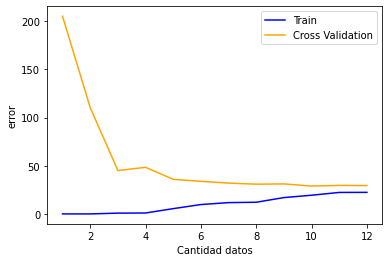

In [13]:
main_part2()

# Apartado 3.  Regresión polinomial

In [14]:
def generate_new_training_data(X, p):
    newX = X
    for i in range(2, p + 1):
        #newX = np.hstack([newX, X ** i])
        newX = np.column_stack([newX, X ** i])
    return newX

In [15]:
def normalize_attributes(X, mean, std_des):
    X_norm = X - mean
    X_norm = X_norm / std_des
    return X_norm

In [16]:
def draw_points(X, y, p, mean, std_des, result):
    # Pintamos grafica
    plt.figure()
    plt.plot(X, y, "x", color='red')
    lineX = np.arange(np.min(X) - 5,np.max(X) + 6,0.05)
    aux_x = (generate_new_training_data(lineX, p) - mean) / std_des
    lineY = np.hstack([np.ones([len(aux_x),1]),aux_x]).dot(result.x)
    plt.plot(lineX, lineY, '-', c = 'blue')
    plt.savefig("Apartado3.1.png")
    plt.show()
    
    plt.close()
    #draw_graph(ThetaOpt, X, y, result, newX)

In [17]:
def main_parte3():
    
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    
    #Cargamos los datos de entranamiento y validación para la X y la y
    X = mat.get("X")
    y = mat.get("y")
    y = y[:, -1]
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    yval = yval[:, -1]
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    #Grado del polinomio
    p = 8
    
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newX = generate_new_training_data(X, p)
    #Media
    mean = np.mean(newX, axis = 0)
    #Desviacion Estandar
    std_des = np.std(newX, axis = 0)
    #Se normalizan los atributos
    X_norm = normalize_attributes(newX, mean, std_des)
    #Se añade columna de 1s
    newX = np.hstack([np.ones([X_norm.shape[0], 1]), X_norm])
    #Tambien se puede escribir: newX = np.insert(X_norm, 0, 1, axis=1)
    #print("newX:", newX)
    
    Theta = np.zeros(newX.shape[1])

    
    #result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(newX, y, Lambda))
    result = opt.minimize(cost_and_gradient, Theta, args=(newX, y, Lambda), jac=True, method='TNC')
    
    draw_points(X, y, p, mean, std_des, result)
    
    
    #Apartado 3.2
    
    #Se genera nuevos datos de VALIDACION a partir de los datos originales Xval
    newXval = generate_new_training_data(Xval, p)
    #Media
    mean_val = np.mean(newXval, axis = 0)
    #Desviacion Estandar
    std_des_val = np.std(newXval, axis = 0)
    #Se normalizan los atributos
    X_norm_val = normalize_attributes(newXval, mean, std_des)
    #Se añade columna de 1s
    newXval = np.hstack([np.ones([X_norm_val.shape[0], 1]), X_norm_val])
    #newXval = X_norm_val
    
    #print("newX", newX)
    #print("newXval", newXval)
    
    err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    draw_learning_curve(err1, err2, "Lambda 0")
    plt.savefig("Apartado3.2.png")
    plt.show()
    
    
    #Apartado 3.2 tests lambda= 1, lambda= 100
    
    Lambda = 1

    err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    draw_learning_curve(err1, err2, "Lambda 1")
    plt.savefig("Apartado3.2_2.png")
    plt.show()
    
    Lambda = 100

    err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    draw_learning_curve(err1, err2, "Lambda 100")
    plt.savefig("Apartado3.2_3.png")
    plt.show()
    

(12, 1) (12,)
(21, 1) (21,)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026


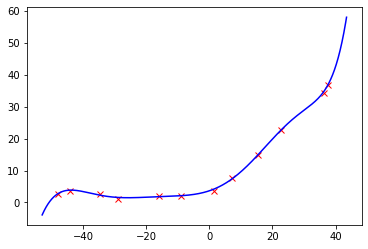

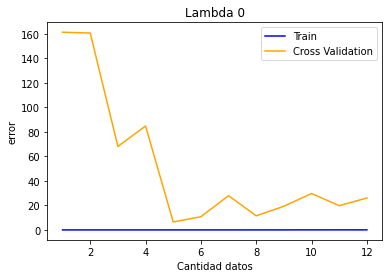

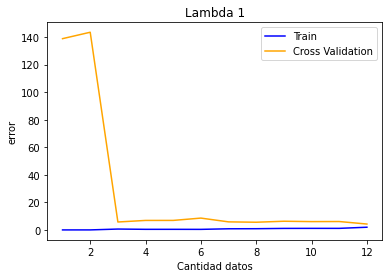

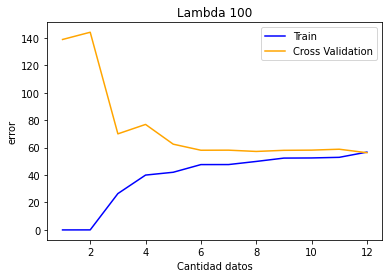

In [18]:
main_parte3()

# Apartado 4.  Regresión polinomial

In [19]:
def cal_func_lambdas(Lambdas, newX, newXval, y, yval, name):
    training = np.zeros((Lambdas.shape[0], 1))
    validation = np.zeros((Lambdas.shape[0], 1))
    
    i = 0
    for Lambda in Lambdas:
        
        Theta = np.zeros(newX.shape[1])
        result = opt.minimize(cost_and_gradient, Theta, args=(newX, y, Lambda), jac=True, method='TNC')
        #result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(newX, y, Lambda))
        
        ThetaOpt = result.x

        training[i] = cost(ThetaOpt, newX, y, newX.shape[0])
        validation[i] = cost(ThetaOpt, newXval, yval, newXval.shape[0])
        i = i + 1
    
    plt.figure()
    
    plt.xlabel("Lambda")
    plt.ylabel("error")
    
    plt.plot(Lambdas,training, label="Entrenamiento")
    plt.plot(Lambdas,validation, label="Validacion")
    plt.savefig(name)
    plt.legend()
    plt.show()
    
    plt.close()

In [20]:
def main_parte4():
    
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    
    X = mat.get("X")
    y = mat.get("y")
    y = y[:, -1]
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    yval = yval[:, -1]
    Xtest = mat.get("Xtest")
    ytest = mat.get("ytest")
    ytest = ytest[:, -1]

    Lambda = 0
    #Grado del polinomio
    p = 8
    
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newX = generate_new_training_data(X, p)
    #Media
    mean = np.mean(newX, axis = 0)
    #Desviacion Estandar
    std_des = np.std(newX, axis = 0)
    #Se normalizan los atributos
    X_norm = normalize_attributes(newX, mean, std_des)
    #Se añade columna de 1s
    newX = np.hstack([np.ones([X_norm.shape[0], 1]), X_norm])
    
    #Se genera nuevos datos de VALIDACION a partir de los datos originales Xval
    newXval = generate_new_training_data(Xval, p)
    #Se normalizan los atributos
    X_norm_val = normalize_attributes(newXval, mean, std_des)
    #Se añade columna de 1s
    newXval = np.hstack([np.ones([X_norm_val.shape[0], 1]), X_norm_val])
    #newXval = X_norm_val
    
    #Se genera nuevos datos de TEST a partir de los datos originales Xtest
    newXtest = generate_new_training_data(Xtest, p)
    #Se normalizan los atributos
    X_norm_test = normalize_attributes(newXtest, mean, std_des)
    #Se añade columna de 1s
    newXtest = np.hstack([np.ones([X_norm_test.shape[0], 1]), X_norm_test])
    
    
    #Apartado 4.1
    Lambdas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    LambdasTest = np.array([2.5, 3,3.5, 4, 4.5 ,5])
    
    cal_func_lambdas(Lambdas, newX, newXval, y, yval, "figure4.1_1.png")
    
    cal_func_lambdas(LambdasTest, newX, newXval, y, yval, "figure4.1_2.png")
    
    #Sacamos la gráfica para lamdba= 3
    Lambda = 3
    Theta = np.zeros(newX.shape[1])
    err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    draw_learning_curve(err1, err2, "Lambda 3")
    plt.savefig("Apartado4_1_lambda3.png")
    plt.show()
    
    #Apartado 4.2
   
    Theta = np.zeros(newX.shape[1])
    Lambda_3 = 3
    res_error = opt.minimize(cost_and_gradient, Theta, args=(newX, y, Lambda_3), jac=True, method='TNC')

    m=  newXtest.shape[0]

    res_cost = cost(res_error.x, newXtest, ytest, m)
    
    print(res_cost)
    

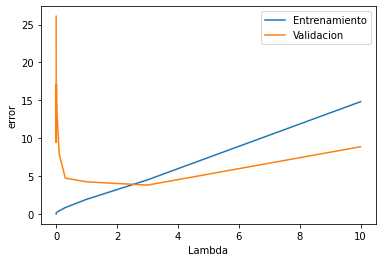

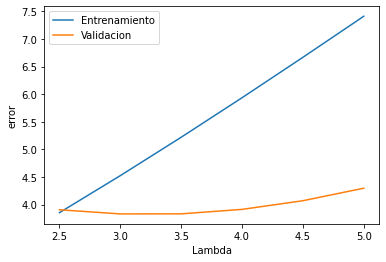

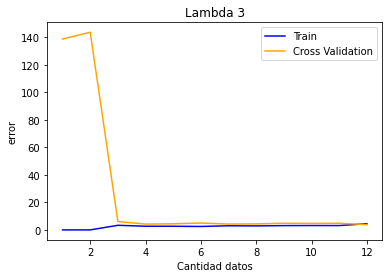

3.572047186128942


In [21]:
main_parte4()